In [ ]:
!pip install sdv

In [2]:
from sdv.timeseries import PAR
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pickle import dump, load

In [3]:
# https://www.kaggle.com/code/xiaxiaxu/predictmachinefailureinadvance/data
sensor = pd.read_csv('sensor.csv') 

# only keeping cols w high var in pca analysis + machine status
data = sensor[['timestamp', 'sensor_25', 'sensor_11', 'sensor_36', 'sensor_34', 'machine_status']]

In [4]:
data_around_failures = data.iloc[16000:26000]
data_around_failures.head() 

,timestamp,sensor_25,sensor_11,sensor_36,sensor_34,machine_status
16000,2018-04-12 02:40:00,649.0801,49.93274,299.4172,160.6844,NORMAL
16001,2018-04-12 02:41:00,651.8054,51.08754,296.3760,162.5435,NORMAL
16002,2018-04-12 02:42:00,650.1391,51.24662,305.7853,164.4021,NORMAL
16003,2018-04-12 02:43:00,649.2632,51.93151,294.0909,166.5538,NORMAL
16004,2018-04-12 02:44:00,643.1567,51.71158,298.7494,168.0882,NORMAL


In [5]:
data_around_failures['timestamp']= pd.to_datetime(data_around_failures['timestamp'])


/tmp/ipykernel_3449/8706744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_around_failures['timestamp']= pd.to_datetime(data_around_failures['timestamp'])


In [6]:
print(data_around_failures[data_around_failures.isna().any(axis=1)])

# we only have one row with NA, let's simply drop that.

data_around_failures.dropna(axis=0, inplace=True)

print(data_around_failures[data_around_failures.isna().any(axis=1)])

                timestamp  sensor_25  sensor_11  sensor_36  sensor_34  \
25112 2018-04-18 10:32:00   778.3798        NaN   320.4606   168.2153   

      machine_status  
25112     RECOVERING  
Empty DataFrame
Columns: [timestamp, sensor_25, sensor_11, sensor_36, sensor_34, machine_status]
Index: []


/tmp/ipykernel_3449/695179921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_around_failures.dropna(axis=0, inplace=True)


In [7]:
sensor_25_data = data_around_failures[['timestamp', 'sensor_25']]
sensor_25_data.head()

,timestamp,sensor_25
16000,2018-04-12 02:40:00,649.0801
16001,2018-04-12 02:41:00,651.8054
16002,2018-04-12 02:42:00,650.1391
16003,2018-04-12 02:43:00,649.2632
16004,2018-04-12 02:44:00,643.1567


<AxesSubplot:xlabel='timestamp'>

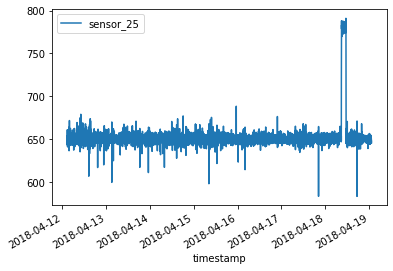

In [8]:
import matplotlib.pyplot as plt

sensor_25_data.set_index('timestamp').plot()

In [9]:
sensor_25_scaler = MinMaxScaler()

# scaling our data, then saving our scaler object for future use.
sensor_25_data[['sensor_25']] = sensor_25_scaler.fit_transform(sensor_25_data[['sensor_25']])

dump(sensor_25_scaler, open('sensor_25_scaler.pkl', 'wb'))

/tmp/ipykernel_3449/3145465808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sensor_25_data[['sensor_25']] = sensor_25_scaler.fit_transform(sensor_25_data[['sensor_25']])
/opt/app-root/lib64/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [10]:
print(sensor_25_data.dtypes)
print(len(sensor_25_data))

sensor_25_data.head()

timestamp    datetime64[ns]
sensor_25           float64
dtype: object
9999


,timestamp,sensor_25
16000,2018-04-12 02:40:00,0.317054
16001,2018-04-12 02:41:00,0.330166
16002,2018-04-12 02:42:00,0.322149
16003,2018-04-12 02:43:00,0.317935
16004,2018-04-12 02:44:00,0.288555


In [16]:
# okay, we should be set to train our first model. let's give it a go!

sequence_index = 'timestamp'
sensor_25_model = PAR(sequence_index = sequence_index, verbose=True, epochs=48)


In [17]:
sensor_25_model.fit(sensor_25_data)

PARModel(epochs=48, sample_size=1, cuda='cpu', verbose=True) instance created


Epoch 48 | Loss 1400.43408203125: 100%|██████████| 48/48 [05:21<00:00,  6.70s/it] 


In [18]:
sensor_25_model.save('25_model.pkl')

In [14]:
# sample = sensor_25_model.sample(num_sequences=1)

In [15]:
# sample.set_index('timestamp').plot()